# Hallucinating robot notebook

*Francesco Verdoja, Jens Lundell*

In [1]:
## Import all general configurations
%load_ext autoreload
%autoreload 2

from config import *

In [2]:
## Specific run configurations (can override values in config.py)

#Pre-trained network loading
net_load = False
net_load_file = ''

#Network parameters (they have to match those in the net_load_file if net_load is True)
#net_layer_sizes = [16,32,64]
net_layer_sizes = [16,32,64,128]
#net_layer_sizes = [16,32,64,128,256]
net_skip_connections = False
net_activation_gamma = 1.0
augm_noise = 0.0
augm_flip = True

if net_skip_connections:
    net = hn.AutoEncSkipAdd(net_layer_sizes, net_activation_gamma)
else:
    net = hn.AutoEnc(net_layer_sizes, net_activation_gamma)
net = hn.to_cuda(net, use_cuda)

# Loss function and optimizer
#criterion = nn.MSELoss()
criterion = hn.RMSLE()
#criterion = hn.SkewedMSE(0.5)
optimizer = optim.Adam(net.parameters(), lr=0.001)
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Dataset augmentations
train_aug = [hd.AugmentMinGroundtruth()]
if augm_flip:
    train_aug.append(hd.AugmentRandomFlip())
if augm_noise > 0:
    train_aug.append(hd.AugmentAddRandomGaussianNoise(sigma=augm_noise))
train_augmentations = transforms.Compose(train_aug)

test_augmentations = hd.AugmentMinGroundtruth()

("Let's use", 2L, 'GPUs!')
loading network on CUDA


In [3]:
## Training (or loading trained network)
if net_load:
    print("Loading network parameters from file: %s" % net_load_file)
    net.load_state_dict(tc.load("%s%s" % (net_dump_folder, net_load_file)))
    print("Network loaded correctly")
    net.eval()
else:
    print("Starting training (%d samples, %d epochs)" % (len(train_dataloader.dataset), n_of_epochs))
    hn.train(net, train_dataloader, criterion, optimizer, n_of_epochs, train_augmentations)
    print("Finished training")
    
    #Preparing network filename
    skip = "y" if net_skip_connections else "n"
    n_layers = len(net_layer_sizes)
    g = repr(round(net_activation_gamma, 4)).replace(".", "_")
    n = "" if augm_noise == 0 else repr(round(augm_noise,4)).replace(".", "_")
    f = "f" if augm_flip else ""
    timestamp = datetime.datetime.now().strftime("%y_%m_%d_%H%M%S")
    filename = "%sNet-%d-%s-%s-%s%s-%s.pt" % (net_dump_folder, n_layers, skip, g, n, f, timestamp)
    
    #Saving network to file
    tc.save(net.state_dict(), filename)
    print("Saving network parameters in file %s" % (filename))

Starting training (27904 samples, 2000 epochs)
[1,   400] loss: 0.067
[1,   800] loss: 0.049
[2,   400] loss: 0.043
[2,   800] loss: 0.041
[3,   400] loss: 0.039
[3,   800] loss: 0.039
[4,   400] loss: 0.037
[4,   800] loss: 0.037
[5,   400] loss: 0.036
[5,   800] loss: 0.036
[6,   400] loss: 0.035
[6,   800] loss: 0.035
[7,   400] loss: 0.034
[7,   800] loss: 0.034
[8,   400] loss: 0.033
[8,   800] loss: 0.033
[9,   400] loss: 0.033
[9,   800] loss: 0.033
[10,   400] loss: 0.032
[10,   800] loss: 0.033
[11,   400] loss: 0.032
[11,   800] loss: 0.032
[12,   400] loss: 0.031
[12,   800] loss: 0.031
[13,   400] loss: 0.031
[13,   800] loss: 0.030
[14,   400] loss: 0.031
[14,   800] loss: 0.030
[15,   400] loss: 0.030
[15,   800] loss: 0.030
[16,   400] loss: 0.030
[16,   800] loss: 0.030
[17,   400] loss: 0.030
[17,   800] loss: 0.029
[18,   400] loss: 0.029
[18,   800] loss: 0.029
[19,   400] loss: 0.029
[19,   800] loss: 0.029
[20,   400] loss: 0.029
[20,   800] loss: 0.029
[21,   400]

Process Process-468:
Process Process-467:
Process Process-470:
Process Process-472:
Process Process-471:
Process Process-465:
Process Process-466:
Process Process-469:
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bo

KeyboardInterrupt: 

In [7]:
## Test set performance evaluation
print("Starting testing")
loss = hn.test(net, test_dataloader, criterion, test_augmentations)
print("Finished testing")
print('Average performance of the network on the test set (%d samples): %f' % (len(test_dataloader.dataset), loss))

Starting testing
Finished testing
Average performance of the network on the test set (11604 samples): 0.030603


In [ ]:
## Plot a batch from a dataloader

dataiter = iter(train_dataloader)
#dataiter = iter(test_dataloader)

data = dataiter.next()

hp.plot_batch(data)

(1, '/', 32)


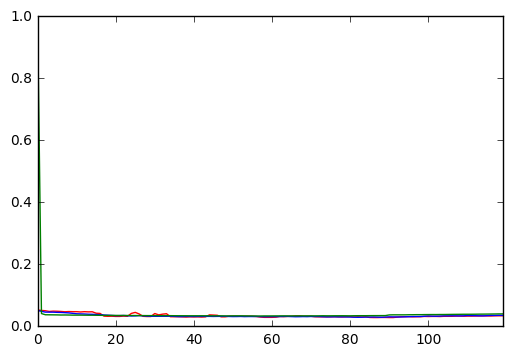

(2, '/', 32)


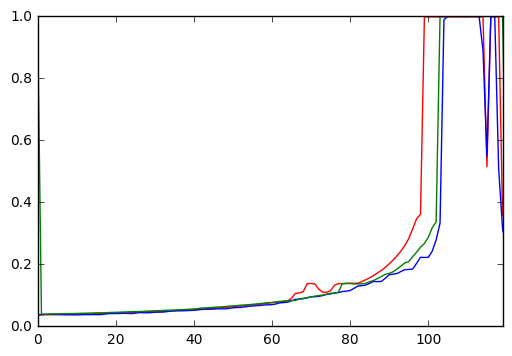

(3, '/', 32)


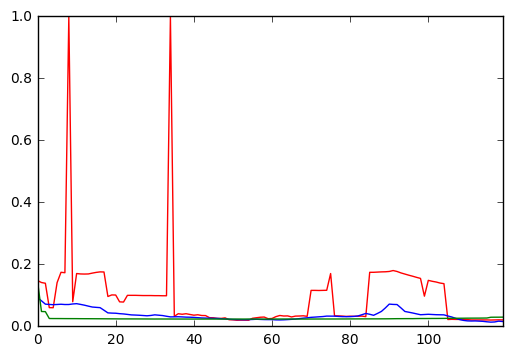

(4, '/', 32)


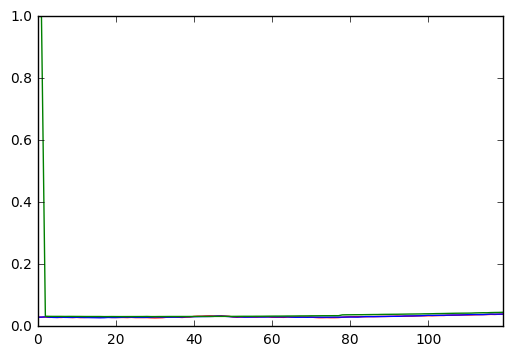

(5, '/', 32)


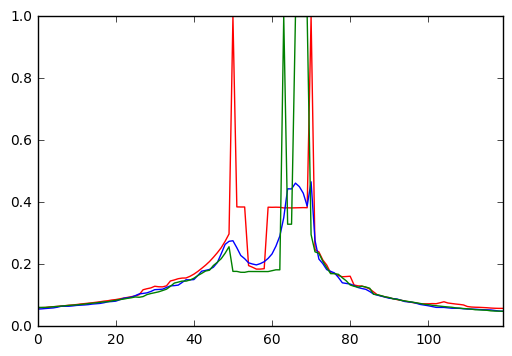

(6, '/', 32)


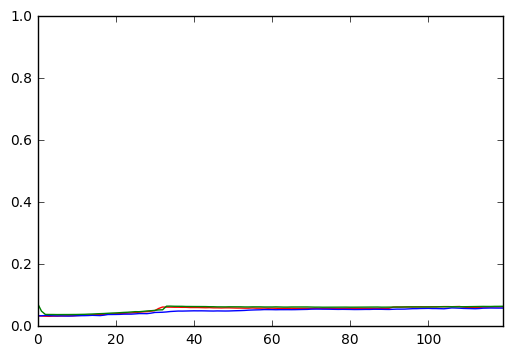

(7, '/', 32)


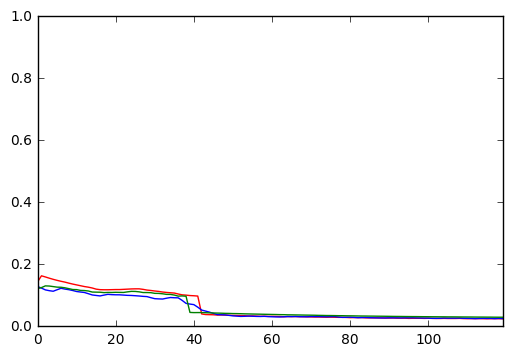

(8, '/', 32)


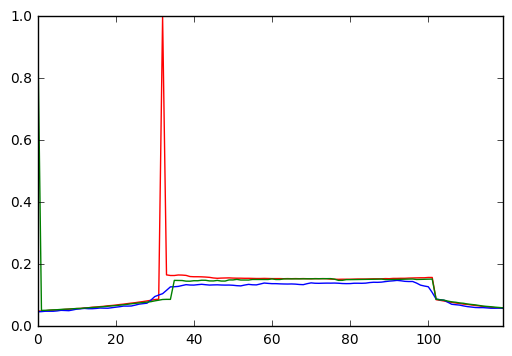

(9, '/', 32)


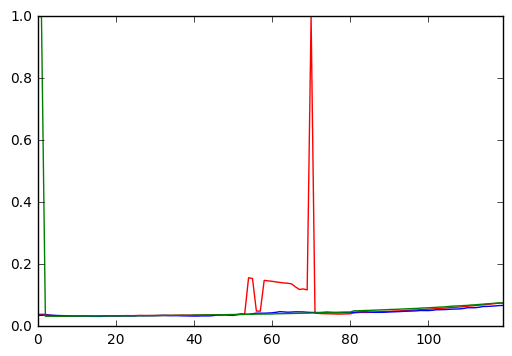

(10, '/', 32)


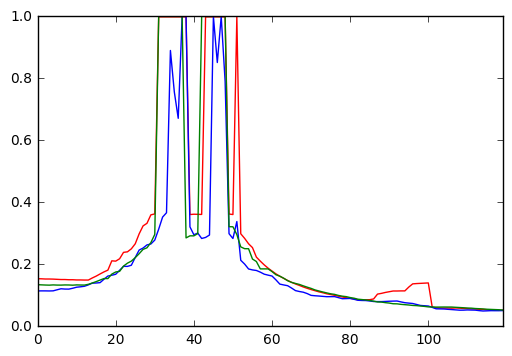

(11, '/', 32)


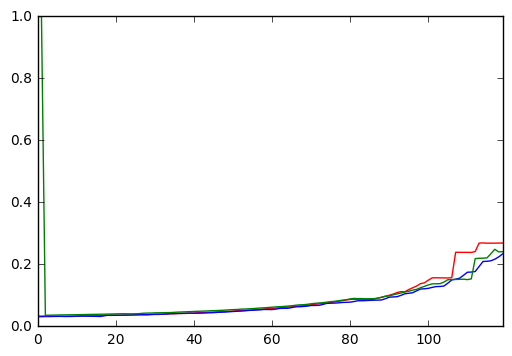

(12, '/', 32)


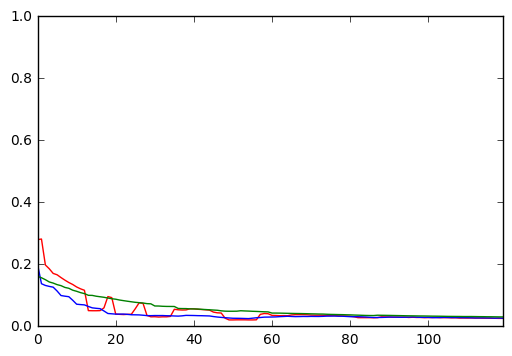

(13, '/', 32)


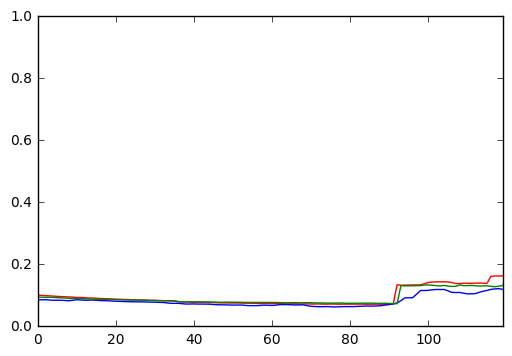

(14, '/', 32)


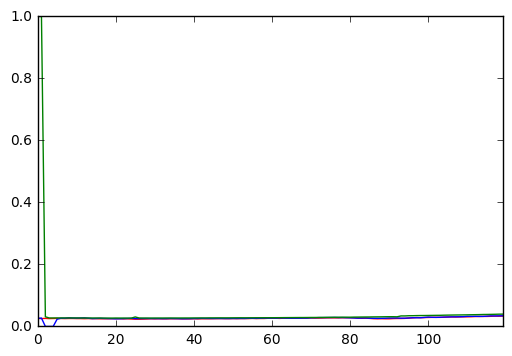

(15, '/', 32)


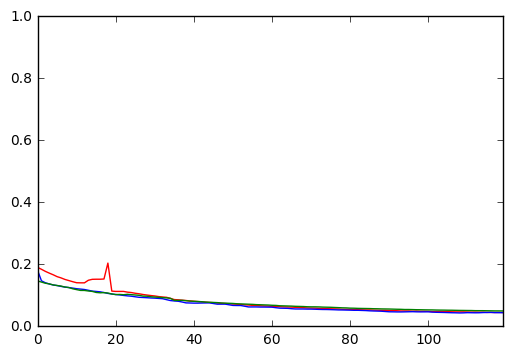

(16, '/', 32)


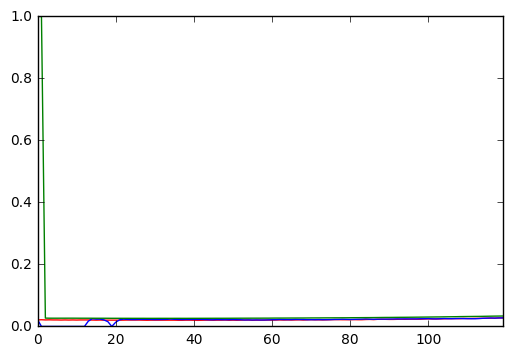

(17, '/', 32)


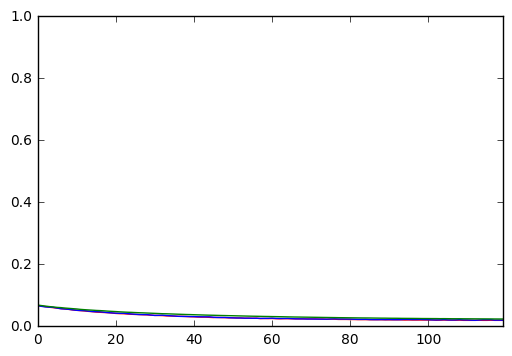

(18, '/', 32)


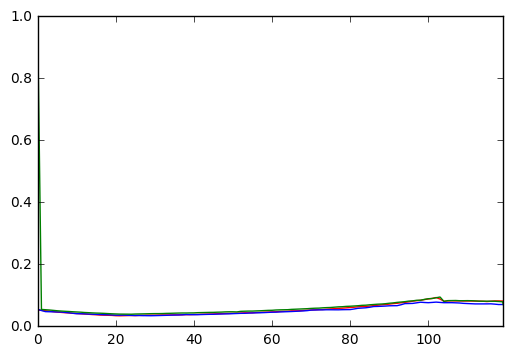

(19, '/', 32)


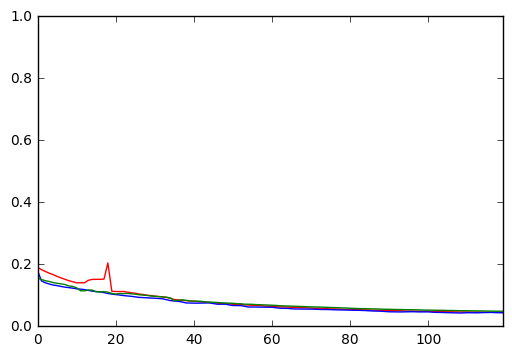

(20, '/', 32)


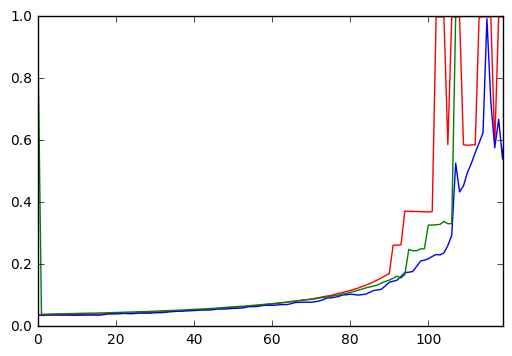

(21, '/', 32)


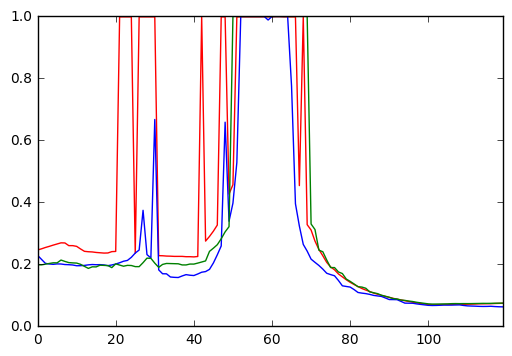

(22, '/', 32)


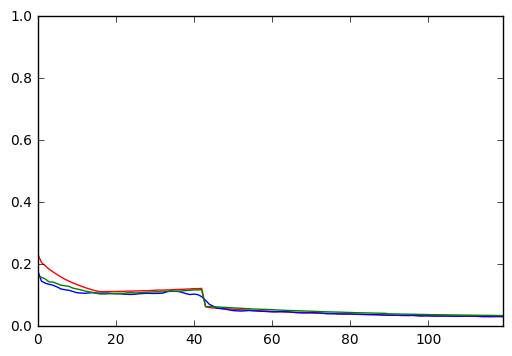

(23, '/', 32)


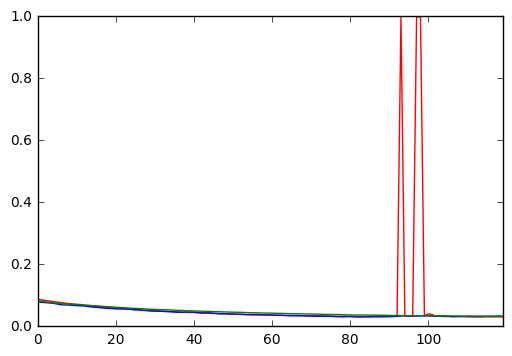

(24, '/', 32)


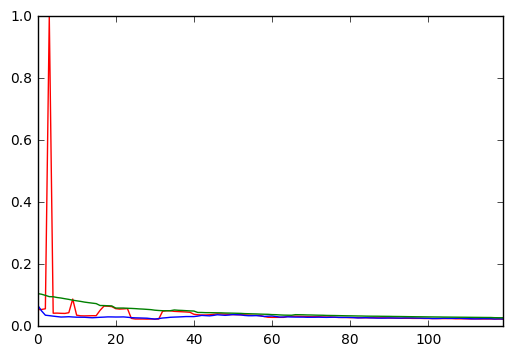

(25, '/', 32)


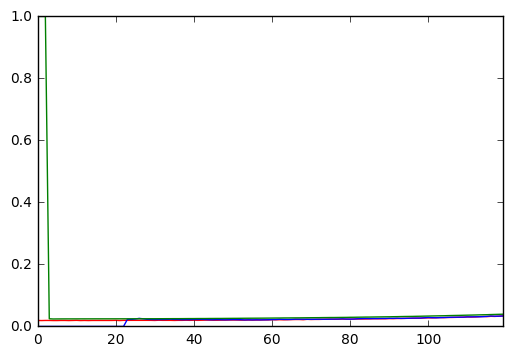

(26, '/', 32)


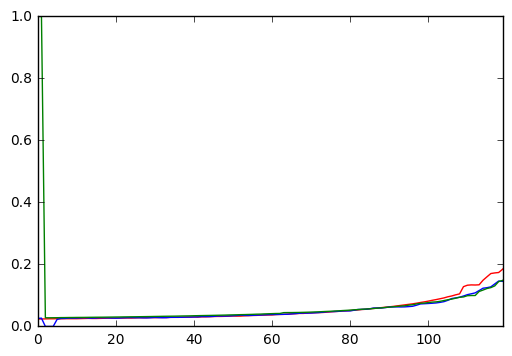

(27, '/', 32)


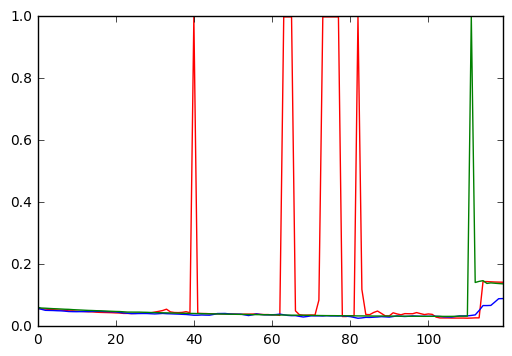

(28, '/', 32)


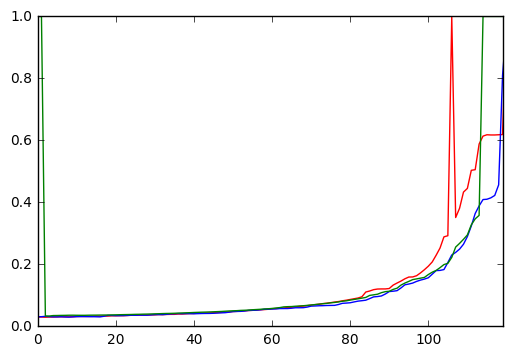

(29, '/', 32)


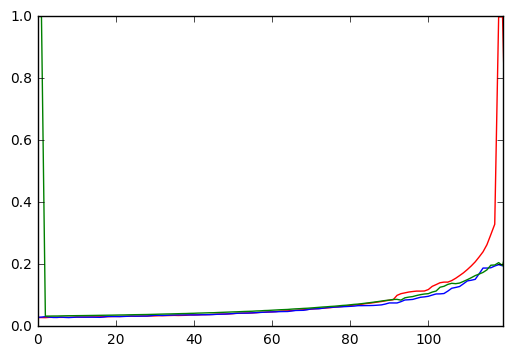

(30, '/', 32)


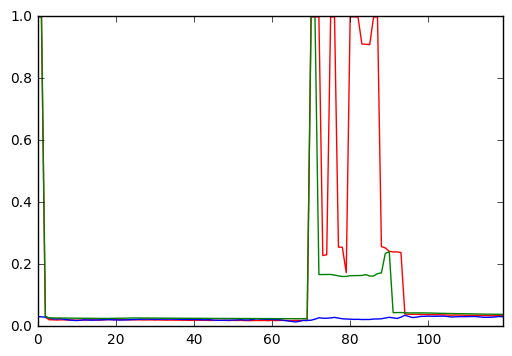

(31, '/', 32)


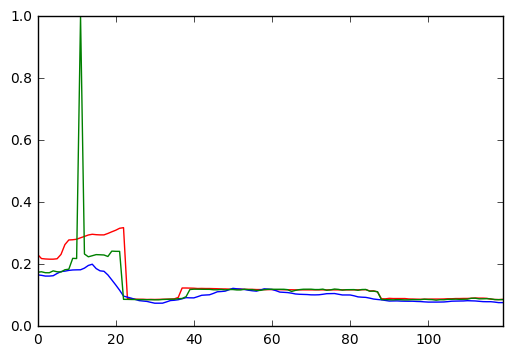

(32, '/', 32)


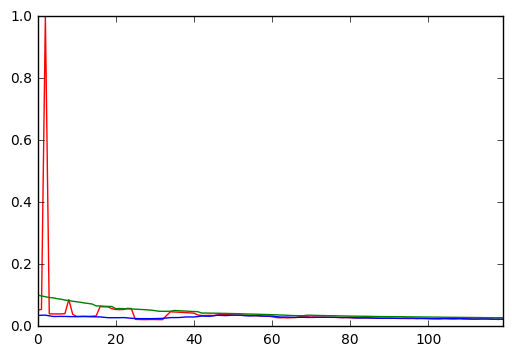

In [8]:
## Plot results from training or test set

#dataiter = iter(train_dataloader)
dataiter = iter(test_dataloader)

data = dataiter.next()

inputs = data['laser'].unsqueeze_(1).float()
truths = data['truth'].unsqueeze_(1).float()
inputs_v = hn.to_variable(inputs)
outputs = net(inputs_v)

hp.plot_out_batch(inputs.squeeze_(), outputs.cpu().data.squeeze_(), truths.squeeze_())

### Reminder
A **convolution specified** by
- input size $i$,
- kernel size $k$,
- stride $s$,
- padding size $p$,
has an output size given by
$$o = \left\lfloor \frac{i + 2p - k}{s} \right\rfloor + 1.$$

While a **transposed convolution**, has an output size given by:
$$o = s (i - 1) + a + k - 2p, \quad a \in \{0, \ldots, s - 1\}$$

where $a$ is a user-specified quantity used to distinguish between the $s$ different possible output sizes.

### Loss function
Other cost functions possibilities:
$$\mathcal{L} = \frac{1}{n} \sum_{i=1}^n x^2 \left(\frac{e^{kx}-1}{e^{kx}+1} + \alpha\right)^2,~~~~~0<\alpha<1$$
better:
$$\mathcal{L} = \frac{1}{n} \sum_{i=1}^n x^2 \left(sign(x) + \alpha\right)^2,~~~~~0<\alpha<1$$